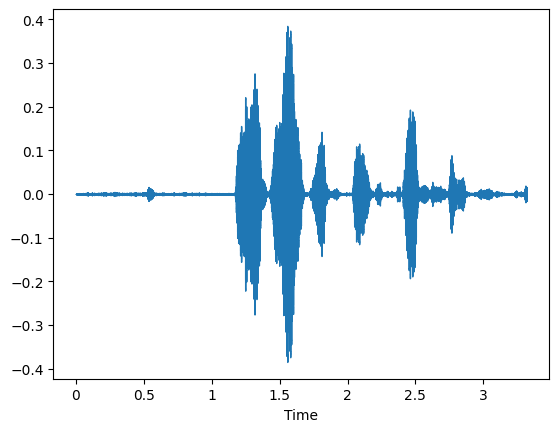

In [13]:
import librosa as lb
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt
import os

y, sr = lb.load("AI_SPEECH.wav")
#A1
def finite_difference_derivative(signal):
    x = np.diff(signal)
    return np.append(x,0)
lb.display.waveshow(y)
#Audio(data=y,rate=sr)
Audio(data=y,rate=sr)

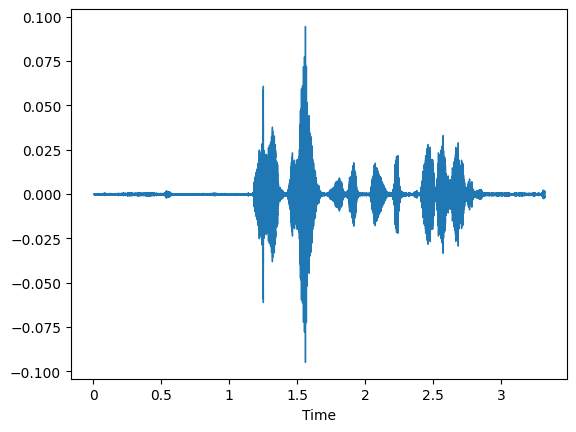

In [14]:
yk = finite_difference_derivative(y)
lb.display.waveshow(yk)
Audio(data=yk,rate=sr)

Average length between zero crossings for speech: 0.00016728834633208996 samples
Average length between zero crossings for silence: 0.00017142737200669277 samples


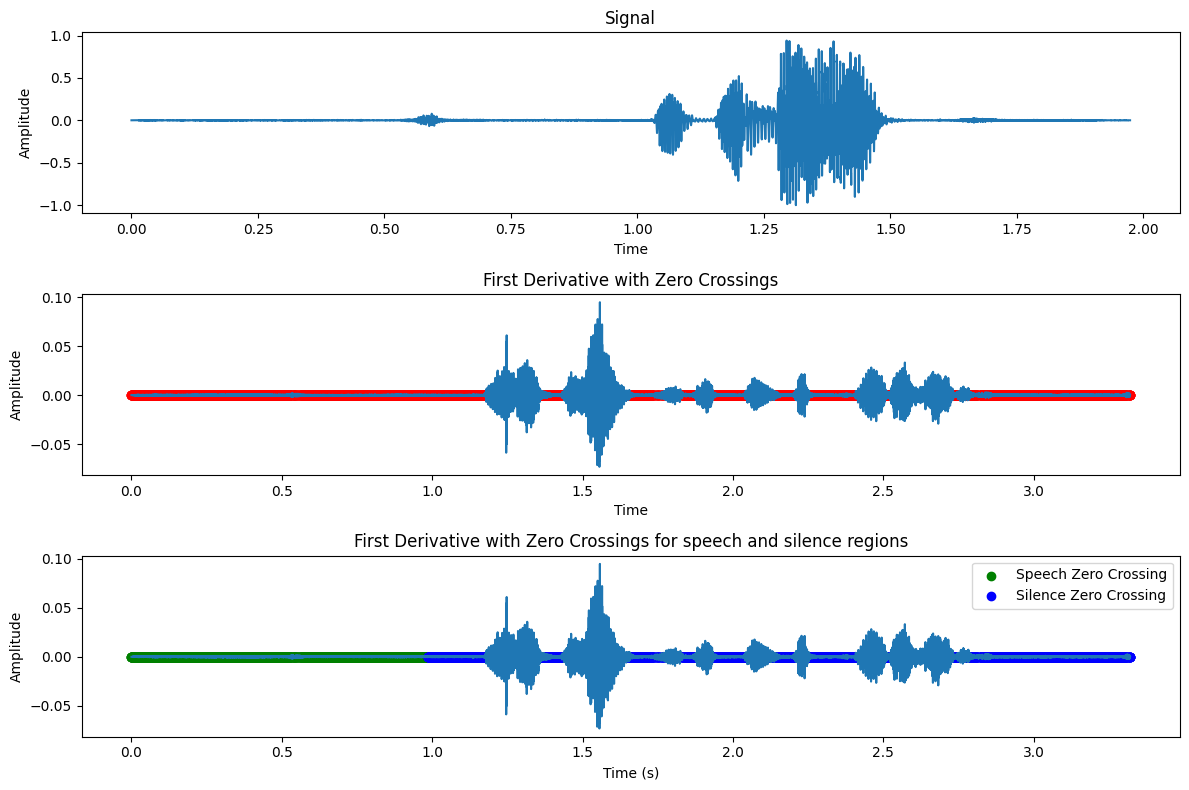

In [23]:
def zero_crossing_func(derivative):
    zero_crossing = np.where(np.diff(np.sign(derivative)))[0]
    return zero_crossing

def average_length(zero_crossing, sr):
    zero_crossing_times = zero_crossing / sr
    differences = np.diff(zero_crossing_times)
    average_length = np.mean(differences)
    return average_length

# Plot the original signal and its derivative with zero crossings
time = np.arange(0, len(y)) / sr

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, y)
plt.title('Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
time_derivative = np.arange(0, len(yk)) / sr
plt.plot(time_derivative, yk)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.scatter(zero_crossing / sr, np.zeros_like(zero_crossing), color='red', marker='o', label='Zero Crossing')

zero_crossing = zero_crossing_func(yk)

speech_zero_crossings = zero_crossing[zero_crossing < len(y) / 2]
silence_zero_crossings = zero_crossing[zero_crossing >= len(y) / 2]


average_length_speech = average_length(speech_zero_crossings, sr)
average_length_silence = average_length(silence_zero_crossings, sr)

print(f"Average length between zero crossings for speech: {average_length_speech} samples")
print(f"Average length between zero crossings for silence: {average_length_silence} samples")
a=speech_zero_crossings / sr
b=silence_zero_crossings / sr
plt.subplot(3, 1, 3)
plt.plot(time_derivative, yk)
plt.title('First Derivative with Zero Crossings for speech and silence regions')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.scatter(a, np.zeros_like(speech_zero_crossings), color='green', marker='o', label='Speech Zero Crossing')
plt.scatter(b, np.zeros_like(silence_zero_crossings), color='blue', marker='o', label='Silence Zero Crossing')
plt.legend()

plt.tight_layout()
plt.show()


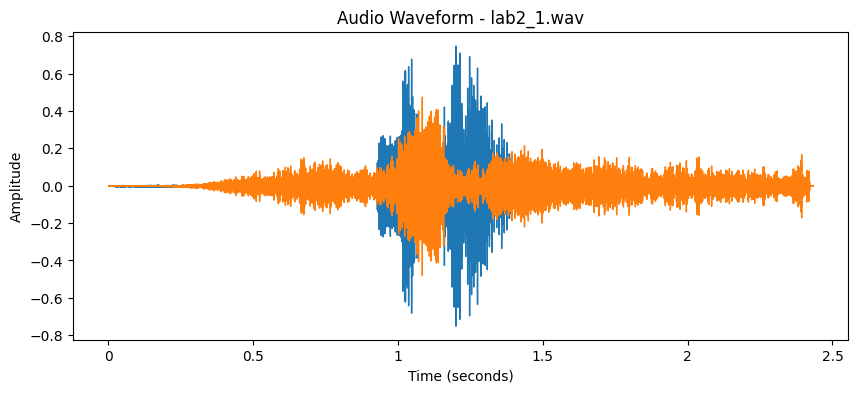

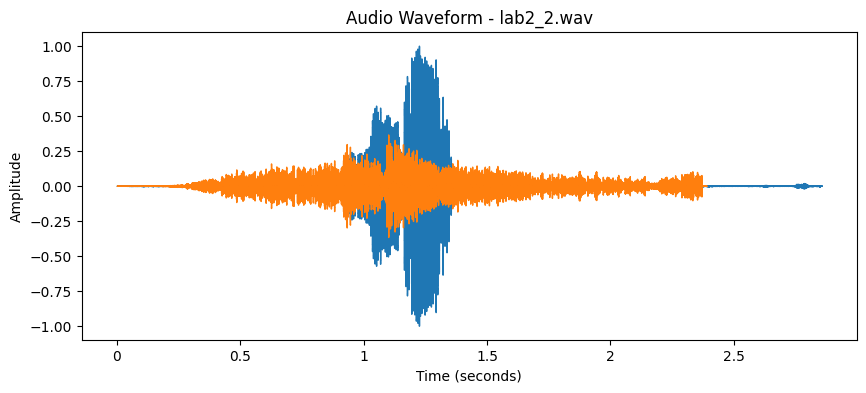

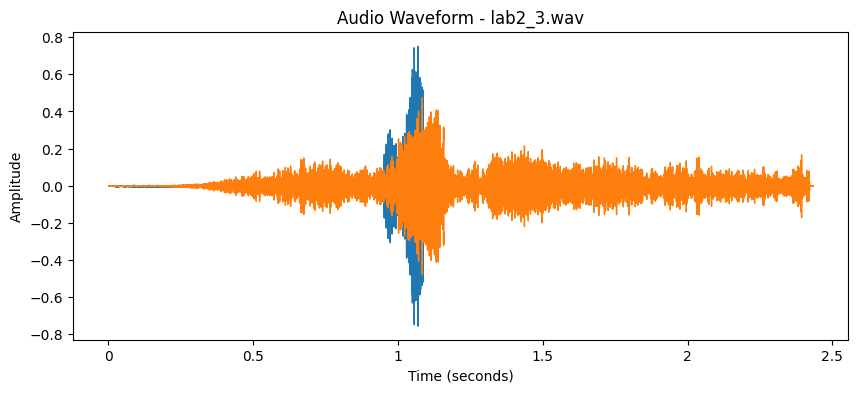

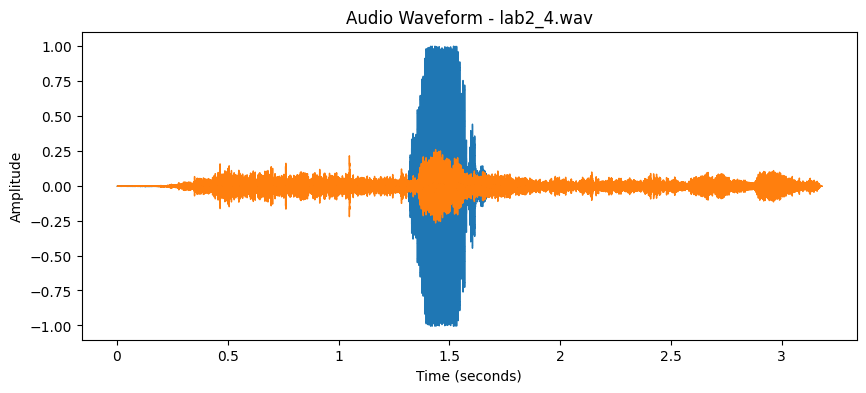

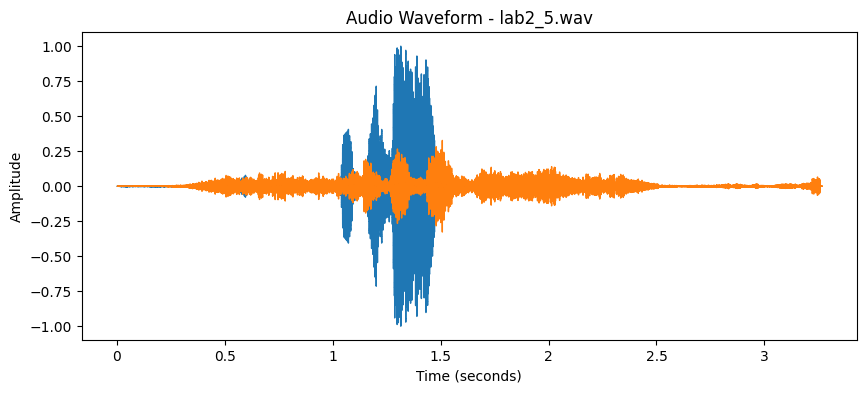

Length of spoken words: [1.6486167800453515, 2.8560544217687074, 1.8808163265306121, 2.182675736961451, 1.9736961451247166]
Length of spoken words: [2.432018140589569, 2.389342403628118, 2.4324263038548755, 3.179138321995465, 3.2644897959183674]


In [22]:
length1 = []
length2 = []
spoken_words_1 = ["lab_2_1", "lab_2_2", "lab_2_3", "lab_2_4", "lab_2_5"]
spoken_words_2 = ["lab2_1", "lab2_2", "lab2_3", "lab2_4", "lab2_5"]
for word in range(0,len(spoken_words_1)):
  word1 = f"{spoken_words_1[word]}.wav"
  word2 = f"{spoken_words_2[word]}.wav"
  y1, sr = lb.load(word1)
  y2, sr = lb.load(word2)
  length1.append(len(y1) / sr)
  length2.append(len(y2) / sr)
  plt.figure(figsize=(10, 4))
  lb.display.waveshow(y1)
  plt.title(f'Audio Waveform - {os.path.basename(word1)}')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')
  lb.display.waveshow(y2)
  plt.title(f'Audio Waveform - {os.path.basename(word2)}')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')
  plt.show()
print("Length of spoken words:", length1)
print("Length of spoken words:", length2)

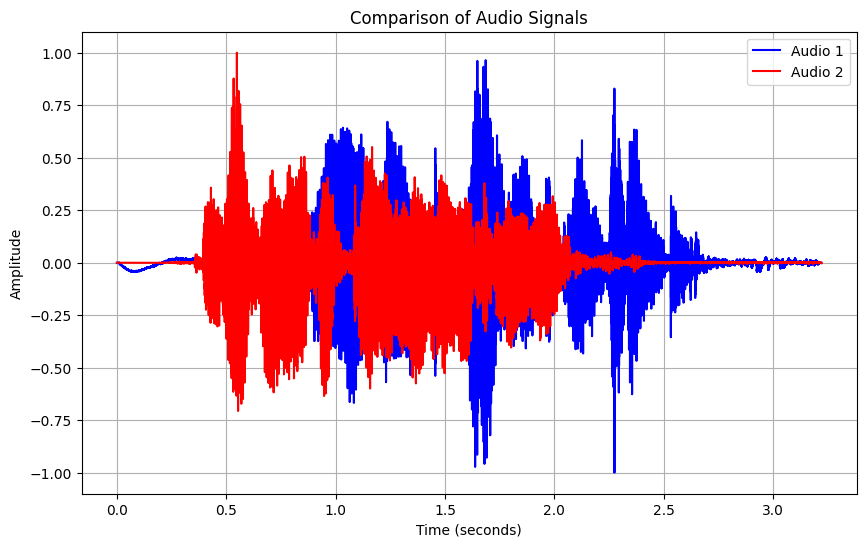

In [24]:
y1, sr = lb.load("lab_2_st.wav")

# Load the second audio file
y2, sr = lb.load("lab_2_qu.wav")

# Ensure both audio signals have the same length
min_length = min(len(y1), len(y2))
audio_data_1 = y1[:min_length]
audio_data_2 = y2[:min_length]

# Normalize audio data to be in the range [-1, 1]
yk1 = audio_data_1.astype(float) / np.max(np.abs(audio_data_1))
yk2 = audio_data_2.astype(float) / np.max(np.abs(audio_data_2))

# Create time axis for plotting
time_axis = np.arange(len(yk1)) / sr

# Plot both audio signals on the same graph
plt.figure(figsize=(10, 6))
plt.plot(time_axis, yk1, color='blue', label='Audio 1')
plt.plot(time_axis, yk2, color='red', label='Audio 2')
plt.title('Comparison of Audio Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()